<a href="https://colab.research.google.com/github/ishneha1/AI_foundation/blob/main/Logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

=== Breast Cancer Dataset ===
Accuracy: 0.9737
Precision: 0.9722
Recall: 0.9859
F1-Score: 0.9790


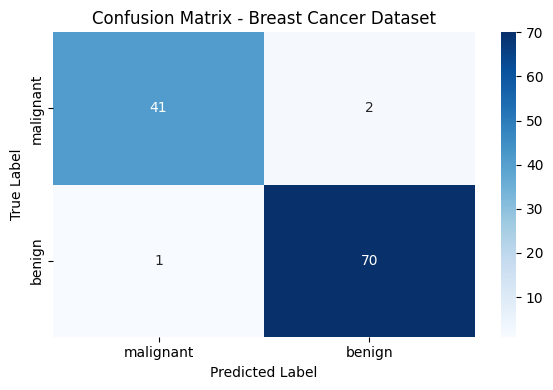

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Solution 1: Breast Cancer Dataset
bc_data = load_breast_cancer()
X_bc = pd.DataFrame(bc_data.data, columns=bc_data.feature_names)
y_bc = pd.Series(bc_data.target)

# Train-test split
X_train_bc, X_test_bc, y_train_bc, y_test_bc = train_test_split(
    X_bc, y_bc, test_size=0.2, random_state=42
)

# Feature scaling
scaler_bc = StandardScaler()
X_train_scaled_bc = scaler_bc.fit_transform(X_train_bc)
X_test_scaled_bc = scaler_bc.transform(X_test_bc)

# Logistic Regression model
model_bc = LogisticRegression(max_iter=10000)
model_bc.fit(X_train_scaled_bc, y_train_bc)
y_pred_bc = model_bc.predict(X_test_scaled_bc)

# Metrics
cm = confusion_matrix(y_test_bc, y_pred_bc)
acc = accuracy_score(y_test_bc, y_pred_bc)
prec = precision_score(y_test_bc, y_pred_bc)
rec = recall_score(y_test_bc, y_pred_bc)
f1 = f1_score(y_test_bc, y_pred_bc)

# Print metrics
print("=== Breast Cancer Dataset ===")
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1-Score: {f1:.4f}")

# Confusion Matrix Visualization
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=bc_data.target_names,
            yticklabels=bc_data.target_names)
plt.title('Confusion Matrix - Breast Cancer Dataset')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# 1. Load the data
df = pd.read_csv("/content/sample_data/titanic.csv")

# 2. Drop irrelevant or redundant columns
df.drop(columns=['class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone'], inplace=True, errors='ignore')

# 3. Handle missing values
df['age'] = df['age'].fillna(df['age'].median())
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])

# 4. Encode categorical columns
label_encoders = {}
for col in ['sex', 'embarked']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# 5. Feature matrix and target
X = df.drop('survived', axis=1)
y = df['survived']

# 6. Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 8. Train logistic regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# 9. Predictions and evaluation
y_pred = model.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Accuracy: 0.8044692737430168

Confusion Matrix:
 [[90 15]
 [20 54]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179

